In [77]:
import numpy as np
import math
import cv2

import matplotlib.pyplot as plt
from scipy.fftpack import  dct , idct

#%matplotlib qt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# MERGE

size of original image 225 225


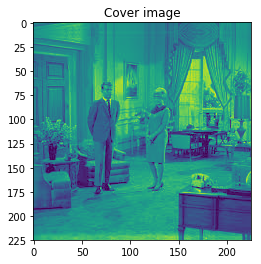

In [59]:
img1 = cv2.imread('../input/Room_512.jpeg',cv2.IMREAD_GRAYSCALE)
row,col =img1.shape
print('size of original image', row,col)

img2 = img1.copy()


plt.title('Cover image')
plt.imshow(img1)

#cv2.imshow("R_Channel",img_r_c2) # For A Channel (Here's what You need)
#cv2.waitKey(0)

computing dct of gray cover image

In [60]:
#computing dct of gray cover
img_fl = np.float32(img2)/255.0  # float conversion/scale
#img_dct = cv2.dct(img_fl)           # the dct
img_dct = dct(img_fl , 2 , norm='ortho') 
print(img_dct)

[[ 7.2467980e+00  3.0548874e-01  2.1168035e-01 ...  2.5311239e-02
   6.7114644e-03  2.7925379e-03]
 [ 7.3179092e+00  4.3775463e-01  2.9704875e-01 ...  2.9712247e-02
   4.3924660e-03  1.6128194e-03]
 [ 7.3741183e+00  5.1697034e-01  3.4248391e-01 ...  2.3726810e-02
  -3.6192455e-03  9.2914579e-03]
 ...
 [ 1.0279740e+01  2.4902129e-01 -7.1438402e-01 ... -9.4275251e-03
   1.4970561e-05  1.1377233e-02]
 [ 1.0166537e+01  3.2855189e-01 -7.0171094e-01 ... -1.5253512e-02
   8.3111115e-03  2.4296816e-03]
 [ 1.0337778e+01  2.4406309e-01 -6.9843167e-01 ... -2.1853209e-02
   1.8172912e-02  6.0997170e-04]]


size of secret 64 64


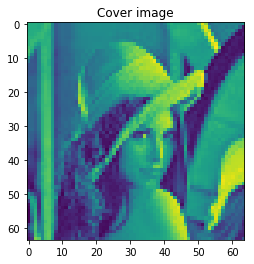

In [61]:
img_sec1 = cv2.imread('../input/lena_re.jpg',cv2.IMREAD_GRAYSCALE)
row1,col1 =img_sec1.shape
print('size of secret', row1,col1)

img_sec2 = img_sec1.copy()


plt.title('Cover image')
plt.imshow(img_sec1)

Brief Steps for stego:
embedSecretToJpeg(pixels, secret, fileout) {
    blocks = splitBlocks(pixels);
    coeffs = dct(blocks);
    modified_coeffs = embedSecret(coeffs, secret);
    saveCoefficients(modified_coeffs, fileout);
}

Computing DCT of secret image

In [62]:
img_sec_fl = np.float32(img_sec2)/255.0  # float conversion/scale
#print(imf)
#img_sec_dct = cv2.dct(img_sec_fl)           # the dct
img_sec_dct = dct(img_sec_fl , 2 , norm='ortho') 
#print(img_sec_dct)

Assigning weight to embed secret image in cover image

In [63]:
weight = 0.5
img_dct_recreate = img_dct.copy()
#print(img_dct_recreate.shape)

img_dct_recreate[row-row1:row,col-col1:col] =   img_dct_recreate[row-row1:row,col-col1:col]  + weight *  img_sec_dct       
print(img_dct_recreate.shape)

(225, 225)


In [64]:
#img_dct_inv = cv2.dct(img_dct_recreate,cv2.DCT_INVERSE)
img_dct_inv = idct(img_dct_recreate, 2 , norm='ortho')

#print(img_dct_inv)

In [65]:
img_inv_int =  np.uint8(img_dct_inv*255)
print(img_inv_int)

[[111 112 113 ... 127 124 124]
 [119 119 120 ... 127 124 124]
 [112 111 109 ... 126 124 124]
 ...
 [164 119 172 ...  57 115 124]
 [162 120 170 ...  58 102 121]
 [167 125 169 ...  46 122 123]]


In [66]:
cv2.imwrite('../output/Stego_Room.jpg' , img_inv_int)

True

# EXTRACT

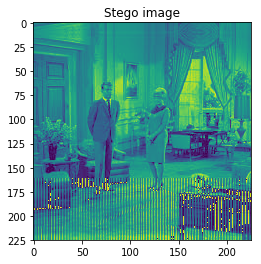

In [68]:
img_merge = cv2.imread('../output/Stego_Room.jpg',cv2.IMREAD_GRAYSCALE)
plt.title('Stego image')
plt.imshow(img_merge)

In [69]:
#Find DCT of stego image(combined with secret image)
img_merge_fl = np.float32(img_merge)/255.0  # float conversion/scale

img_merge_dct = dct(img_merge_fl , 2 , norm='ortho') 

In [70]:
dct_diff = img_merge_dct - img_dct

dct_diff_div = dct_diff/weight

dct_diff_div_crop = dct_diff_div[row-row1:row,col-col1:col]
#dct_diff_div_crop = dct_diff_div[448:512,448:512]
print(dct_diff_div_crop.shape)

(64, 64)


In [71]:
img_ex_sec_inv = idct(dct_diff_div_crop, 2 , norm='ortho')
print(img_ex_sec_inv)

[[ 0.66176903  0.6301559   0.6541351  ...  0.49582192  0.4402323
   0.47509766]
 [ 0.5618545   0.59719515  0.60078824 ...  0.29146338 -0.5770736
   0.5858265 ]
 [ 0.6151182   0.6151058   0.57472545 ...  0.6632836   0.34726954
   0.27630067]
 ...
 [ 0.29837933  0.41168374  0.67627877 ...  0.3770486   0.24920559
   0.221019  ]
 [ 0.2003002   0.33266646  0.665481   ...  0.29856804  0.23226908
   0.22546418]
 [ 0.20453922  0.26309016  0.73727596 ...  0.21670984  0.22563885
   0.34576422]]


In [72]:
img_ex_sec_inv_int = np.uint8(img_ex_sec_inv*255)
cv2.imwrite('../output/extract_secret_Room.jpg' , img_ex_sec_inv_int)

True

$$MSE = \frac{\Sigma \Sigma(In - Out)^2}{MN}$$


M and N are the dimensions of the image

In [75]:
mse =   ((img_sec1 - img_ex_sec_inv_int)**2).mean(axis=None)
print('Mean square error between input secret image and extracted secret image= ', mse)

Mean square error between input secret image and extracted secret image=  90.0078125


In [78]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return(20 * math.log10(PIXEL_MAX / math.sqrt(mse)))

d=psnr(img_sec1,img_ex_sec_inv_int)
print('Peak signal-to-noise ratio is:' , d)

Peak signal-to-noise ratio is: 28.588001538909637
